<a href="https://colab.research.google.com/github/thiagosierr/ML-BASICO-COM-SKLEARN/blob/main/ML_B%C3%81SICO_COM_SKLEARN_07_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 08 - RANSAC (RANdom SAmple Consensus) Regression



### Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasets exemplos colab/008-Dataset.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

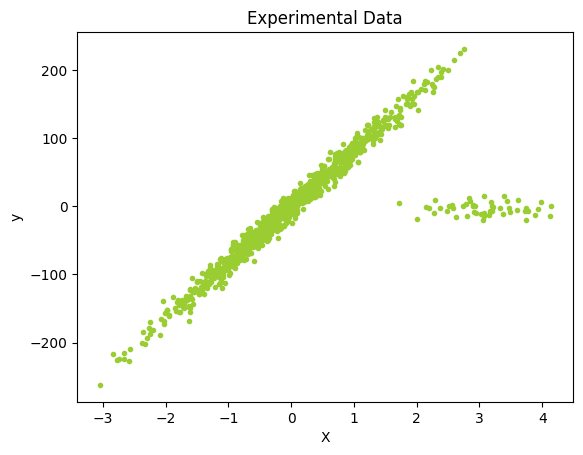

In [ ]:
plt.scatter(X, y, color="yellowgreen", marker=".")      #LEVA EM CONSIDERACAO ESSES OUTLIERS PARA FAZER UMA PREVISAO CORRETA E NAO TENDENCIOSA
plt.title('Experimental Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Regression Fit

In [ ]:
from sklearn.linear_model import RANSACRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html

In [ ]:
regressor = RANSACRegressor()
regressor.fit(X, y)

RANSACRegressor()

In [ ]:
regressor.score(X, y)

0.45124273362072254

## Plot Regression

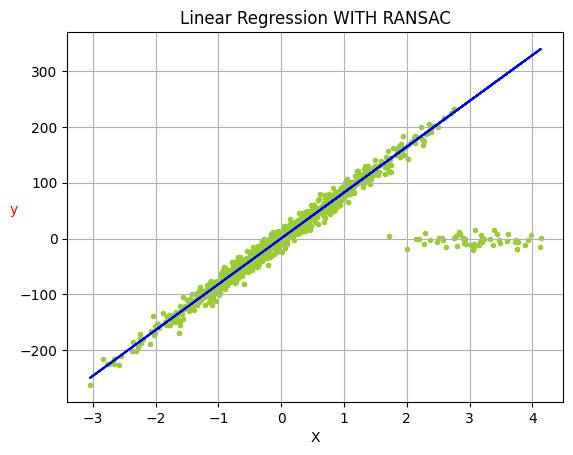

In [ ]:
plt.scatter(X, y, color="yellowgreen", marker=".")
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Linear Regression WITH RANSAC')
plt.xlabel('X')
plt.ylabel('y', rotation=0, c='red')
plt.grid(True)
plt.show()

## Making a single prediction

In [ ]:
regressor.predict([[4]])            #SE NAO USASSE O RANSAC O VALOR DE NUMERO 4 SERIA MODIFICADO PELOS OUTLIERS

array([328.57394378])

# AULA 09 - HuberRegressor Regression



### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasets exemplos colab/008-Dataset.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

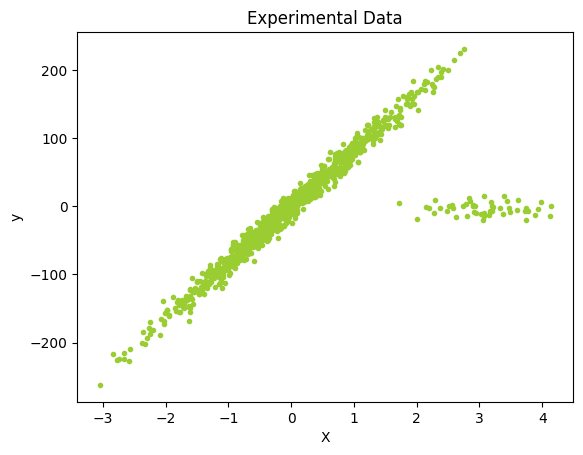

In [ ]:
plt.scatter(X, y, color="yellowgreen", marker=".")
plt.title('Experimental Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Regression Fit

In [ ]:
from sklearn.linear_model import HuberRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html

epsilon: default=1.35

The parameter epsilon controls the number of samples that should be classified as outliers. The smaller the epsilon, the more robust it is to outliers. Epsilon must be in the range [1, inf).

In [ ]:
regressor = HuberRegressor(epsilon=1.2)         #quanto maior o valor, mais o modelo será flexivel com os outliers
regressor.fit(X, y)

HuberRegressor(epsilon=1.2)

In [ ]:
regressor.score(X, y)

0.48084459553667136

## Plot Regression

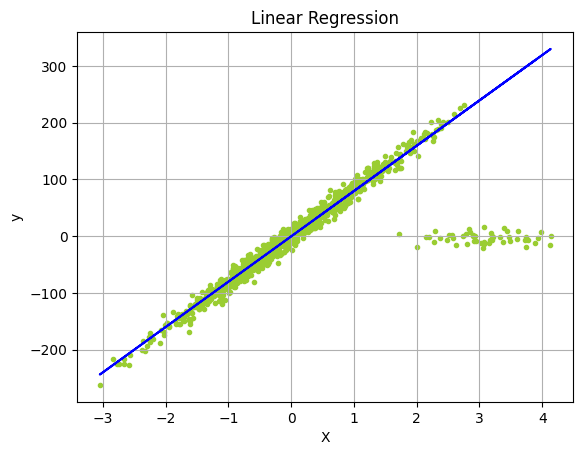

In [ ]:
plt.scatter(X, y, color="yellowgreen", marker=".")
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Making a single prediction

In [ ]:
regressor.predict([[4]])

array([319.15934477])

# AULA 10 - K-Nearest Neighbors Regression
REGRESSÃO QUE UTILIZA A MÉDIA MOVEL DOS VIZINHOS PROXIMOS PARA CALCULAR A TENDENCIA DA CURVA DE PREDIÇÃO

https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html

In summary, model parameters are estimated from data automatically and model hyperparameters are set manually and are used in processes to help estimate model parameters.

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

### Set Default Parameters - To make this notebook's output stable across runs

In [ ]:
default_test_size = 0.2         #20% de dados para testes

In [ ]:
seed = 42               #semente para geracao de numeros aleatorios

### Importing the dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasets exemplos colab/009-Dataset.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
df

,A,B,C,D,Y
0,64.5134,29.9312,3.6090,3.3386,55.7263
1,52.9151,27.8098,9.5488,12.7879,41.2843
2,52.4485,29.8649,3.6538,3.3326,46.9969
3,46.9827,28.1413,3.7789,10.2492,34.5447
4,47.8492,29.5335,3.7585,12.7344,34.3521
...,...,...,...,...,...
549,49.3156,27.6110,9.8286,5.7731,45.4565
550,59.5808,29.4009,6.9737,9.8107,45.6490
551,64.1134,28.6054,12.9234,3.2805,60.7971
552,37.1175,27.3458,13.8620,9.8791,34.2238


In [ ]:
df.describe()

,A,B,C,D,Y
count,554.000000,554.000000,554.000000,554.000000,554.000000
mean,51.605309,28.611343,7.515632,8.345610,42.699901
std,9.543672,1.076074,3.720239,3.603252,8.841489
min,34.051300,26.948000,3.545100,2.336900,31.078600
25%,44.049800,27.693850,3.745900,5.238700,35.315000
50%,50.848700,28.539100,6.936250,7.341200,40.257300
75%,59.580800,29.533500,9.928300,12.720025,48.906475
max,70.579100,33.511000,13.994800,13.168800,62.979400


### Create Pipeline with a StandardScaler and a Regressor

In [ ]:
from sklearn.pipeline import Pipeline                       #faz uma sequencia de analises
from sklearn.preprocessing import StandardScaler            #standarizacao dos dados
from sklearn.model_selection import train_test_split        #faz um split dos dados para separar os de treino e os de teste
from sklearn.model_selection import GridSearchCV            #quais os melhores parametros para aplicar ao modelo, vizinhos?
from sklearn.neighbors import KNeighborsRegressor

StandardScaler:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

KNeighborsRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

Pipeline:

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

GridSearchCV:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=default_test_size, random_state=seed)

In [ ]:
pipe = Pipeline([                    #cria a sequencia de primeiro o scaler e depois a regressao
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
    ])

### Grid Search with Cross Validation

In [ ]:
# hyperparameters grid(lista) to search within
hyperparameters = {'regressor__n_neighbors': [2,3,5,10],
                   'regressor__weights': ['uniform','distance'],
                   'regressor__algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
                  }

In [ ]:
grid_search = GridSearchCV(pipe,
                           param_grid=hyperparameters,      #inseri a lista criada acima como paramentro do grid search
                           return_train_score=True,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-2,
                           cv = 5)

In [ ]:
grid_search.fit(X_train, y_train)       #treina o modelo com todas as possibilidades acima para ver qual é a melhor

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', KNeighborsRegressor())]),
             n_jobs=-2,
             param_grid={'regressor__algorithm': ['auto', 'ball_tree',
                                                  'kd_tree', 'brute'],
                         'regressor__n_neighbors': [2, 3, 5, 10],
                         'regressor__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
# Print Best Hyperparameters
cv_best_params = grid_search.best_params_
print('\n Best hyperparameters:')
print(cv_best_params)           #printa os melhores parametros


 Best hyperparameters:
{'regressor__algorithm': 'auto', 'regressor__n_neighbors': 5, 'regressor__weights': 'distance'}


### Run model with best hyperparameters

In [ ]:
pipe.set_params(**cv_best_params)       #roda o pipe com os melhores parametros

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor(weights='distance'))])

In [ ]:
pipe.get_params()               #pega os melhores parametros

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('regressor', KNeighborsRegressor(weights='distance'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': KNeighborsRegressor(weights='distance'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__algorithm': 'auto',
 'regressor__leaf_size': 30,
 'regressor__metric': 'minkowski',
 'regressor__metric_params': None,
 'regressor__n_jobs': None,
 'regressor__n_neighbors': 5,
 'regressor__p': 2,
 'regressor__weights': 'distance'}

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor(weights='distance'))])

In [ ]:
y_test_pred = pipe.predict(X_test)            #pipe.predict ao inves de modelo.predict para rodar o escalonamento e depois a regressao

In [ ]:
X_test

array([[49.8489, 27.611 ,  9.8066,  5.7962],
       [52.3152, 28.1413,  3.7751, 10.0942],
       [42.8499, 27.6773,  3.7803, 13.1018],
       [40.1837, 27.7435,  3.8049, 13.1592],
       [58.1143, 28.1413,  3.723 , 10.3457],
       [49.3156, 27.611 ,  9.8286,  5.7731],
       [45.3829, 28.8042,  3.7738,  7.1306],
       [69.9126, 31.1908, 12.6823,  5.4449],
       [54.6482, 29.5998,  9.7045,  2.6353],
       [49.049 , 28.4728, 13.0261,  5.1502],
       [39.3838, 27.2132,  9.9719,  7.2762],
       [64.1134, 28.6054, 12.8797,  3.3237],
       [59.5141, 29.7323,  3.6439,  3.3237],
       [62.9803, 28.1413,  3.701 , 10.3486],
       [47.0493, 27.8098,  9.7262, 12.7344],
       [55.1148, 29.1357,  6.8719, 12.7739],
       [45.2496, 28.2076,  3.7834, 10.2241],
       [60.6473, 29.9975,  6.9028,  4.4326],
       [48.1158, 28.8042,  3.6004,  7.0599],
       [58.0477, 29.9312,  6.9385,  4.3654],
       [45.2496, 28.2076,  3.7834, 10.2241],
       [54.0483, 27.8761, 13.4799,  9.9678],
       [61

### Analysis of Regression Errors

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
# Análise dos erros das previsões. # deu um Rquadrado de 0.997, excelente!!
rmse_test = math.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

df_metricas = pd.DataFrame(data={'RSME':[rmse_test], 'MAE':[mae_test], 'MAPE':[mape_test],'R²':[r2_test]})
df_metricas

,RSME,MAE,MAPE,R²
0,0.487334,0.236356,0.005012,0.997183


### Plot Results

In [ ]:
y_pred = pd.DataFrame(data=pipe.predict(X_test), columns=['Predicted Values'])

In [ ]:
y_real = pd.DataFrame(data=y_test, columns=['Real Values'])

In [ ]:
# Preparation of the comparative DataFrame between the prediction and the actual value

df_comparison = pd.concat([y_real, y_pred],axis=1)
df_comparison.columns = ['Real_Data','Predicted_Value']
df_comparison['Percentage_difference'] = 100*(df_comparison['Predicted_Value'] - df_comparison['Real_Data'])/df_comparison['Real_Data']
df_comparison['Average'] = df_comparison['Real_Data'].mean()
df_comparison['Q1'] = df_comparison['Real_Data'].quantile(0.25)
df_comparison['Q3'] = df_comparison['Real_Data'].quantile(0.75)
df_comparison['USL'] = df_comparison['Real_Data'].mean() + 2*df_comparison['Real_Data'].std()
df_comparison['LSL'] = df_comparison['Real_Data'].mean() - 2*df_comparison['Real_Data'].std()

df_comparison.sort_index(inplace=True)

In [ ]:
df_comparison

,Real_Data,Predicted_Value,Percentage_difference,Average,Q1,Q3,USL,LSL
0,45.9058,45.726560,-0.390451,44.151326,36.5987,53.51185,62.596909,25.705743
1,36.3419,36.341900,0.000000,44.151326,36.5987,53.51185,62.596909,25.705743
2,31.7847,31.778976,-0.018009,44.151326,36.5987,53.51185,62.596909,25.705743
3,31.1428,31.142800,0.000000,44.151326,36.5987,53.51185,62.596909,25.705743
4,38.3959,38.291583,-0.271688,44.151326,36.5987,53.51185,62.596909,25.705743
...,...,...,...,...,...,...,...,...
106,40.3857,40.416190,0.075496,44.151326,36.5987,53.51185,62.596909,25.705743
107,52.7096,52.180264,-1.004249,44.151326,36.5987,53.51185,62.596909,25.705743
108,34.6731,34.557721,-0.332763,44.151326,36.5987,53.51185,62.596909,25.705743
109,45.9058,45.726560,-0.390451,44.151326,36.5987,53.51185,62.596909,25.705743


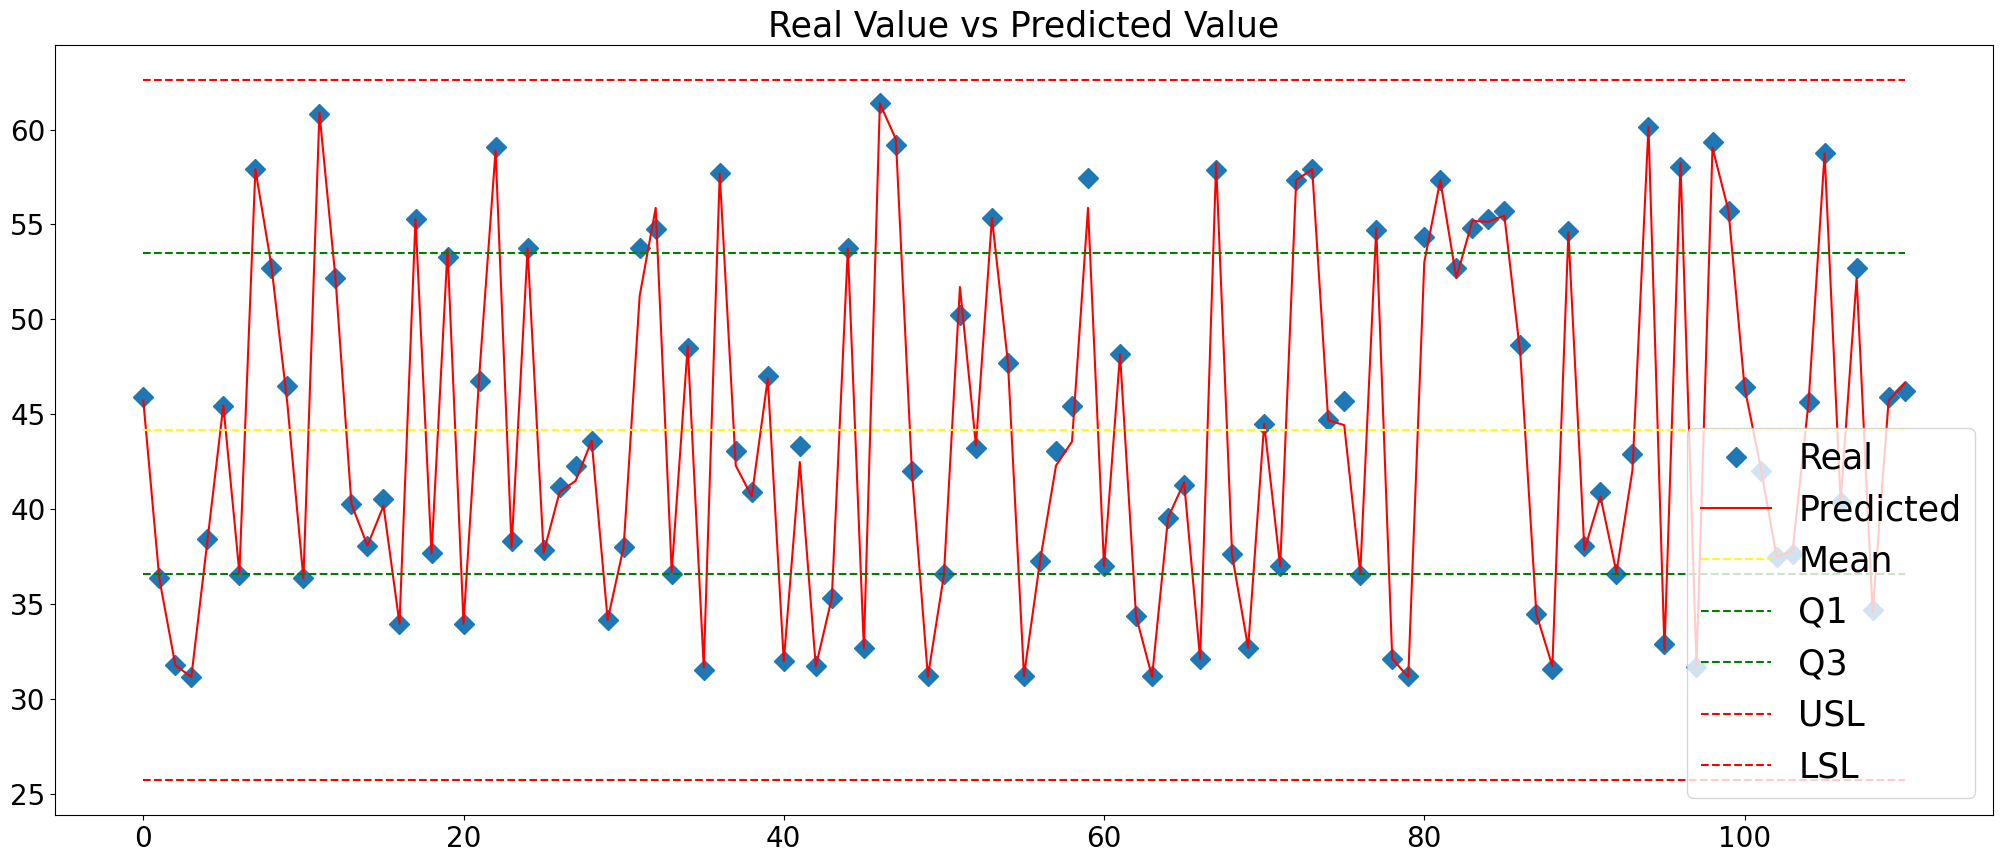

In [ ]:
# Graphic visualization of predictions by real values
plt.figure(figsize=(25,10))
plt.title('Real Value vs Predicted Value', fontsize=25)
plt.plot(df_comparison.index, df_comparison['Real_Data'], label = 'Real', marker='D', markersize=10, linewidth=0)
plt.plot(df_comparison.index, df_comparison['Predicted_Value'], label = 'Predicted', c='r', linewidth=1.5)
plt.plot(df_comparison.index, df_comparison['Average'], label = 'Mean', linestyle='dashed', c='yellow')
plt.plot(df_comparison.index, df_comparison['Q1'], label = 'Q1', linestyle='dashed',c='g')
plt.plot(df_comparison.index, df_comparison['Q3'], label = 'Q3', linestyle='dashed',c='g')

plt.plot(df_comparison.index, df_comparison['USL'], label = 'USL', linestyle='dashed',c='r')
plt.plot(df_comparison.index, df_comparison['LSL'], label = 'LSL', linestyle='dashed',c='r')

plt.legend(loc='best')
plt.legend(fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

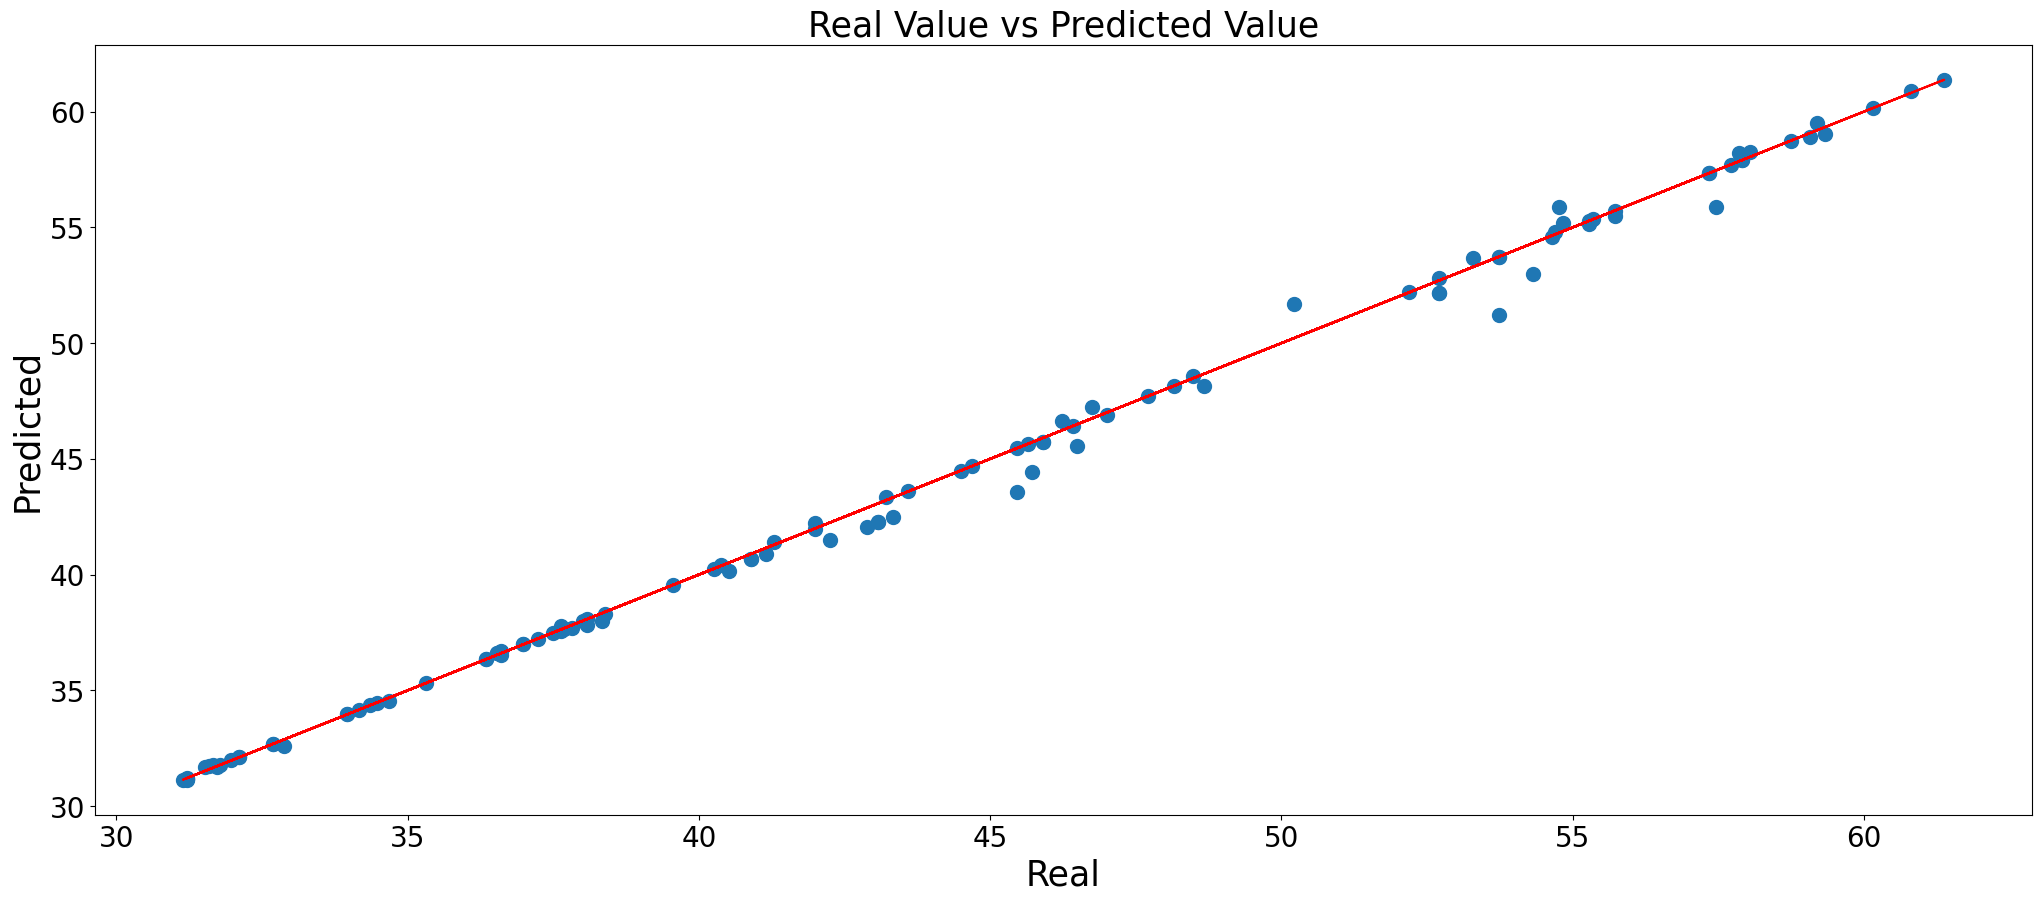

In [ ]:
# Graphic visualization of predictions by real values
plt.figure(figsize=(25,10))
plt.title('Real Value vs Predicted Value',fontsize=25)
plt.scatter(df_comparison['Real_Data'], df_comparison['Predicted_Value'], s=100)
plt.plot(df_comparison['Real_Data'],df_comparison['Real_Data'],c='r')

plt.xlabel('Real', fontsize=25)
plt.ylabel('Predicted', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

# AULA 11 - Support Vector Machines Regression

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

### Set Default Parameters - To make this notebook's output stable across runs

In [ ]:
default_test_size = 0.2

In [ ]:
seed = 42

### Importing the dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasets exemplos colab/010-Dataset.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
df

,A,B,C,D,Y
0,64.5134,29.9312,3.6090,3.3386,55.7263
1,52.9151,27.8098,9.5488,12.7879,41.2843
2,52.4485,29.8649,3.6538,3.3326,46.9969
3,46.9827,28.1413,3.7789,10.2492,34.5447
4,47.8492,29.5335,3.7585,12.7344,34.3521
...,...,...,...,...,...
549,49.3156,27.6110,9.8286,5.7731,45.4565
550,59.5808,29.4009,6.9737,9.8107,45.6490
551,64.1134,28.6054,12.9234,3.2805,60.7971
552,37.1175,27.3458,13.8620,9.8791,34.2238


In [ ]:
df.describe()

### Create Pipeline with a StandardScaler and a Regressor

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR

SVR:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=default_test_size, random_state=seed)

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR())
    ])

### Grid Search with Cross Validation

In [ ]:
# hyperparameters grid to search within
hyperparameters = {'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                   'regressor__degree': [x for x in range(2,10,1)],
                   'regressor__tol': [1e-4],
                   'regressor__C': [0.5,1,2,3,5],
                   'regressor__epsilon': [0.01,0.05,0.1,0.5,1],
                  }

In [ ]:
grid_search = GridSearchCV(pipe,
                           param_grid=hyperparameters,
                           return_train_score=True,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-2,
                           cv = 5)

In [ ]:
# @title
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', SVR())]),
             n_jobs=-2,
             param_grid={'regressor__C': [0.5, 1, 2, 3, 5],
                         'regressor__degree': [2, 3, 4, 5, 6, 7, 8, 9],
                         'regressor__epsilon': [0.01, 0.05, 0.1, 0.5, 1],
                         'regressor__kernel': ['linear', 'poly', 'rbf',
                                               'sigmoid'],
                         'regressor__tol': [0.0001]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
# Print Best Hyperparameters
cv_best_params = grid_search.best_params_
print('\n Best hyperparameters:')
print(cv_best_params)


 Best hyperparameters:
{'regressor__C': 5, 'regressor__degree': 2, 'regressor__epsilon': 0.01, 'regressor__kernel': 'rbf', 'regressor__tol': 0.0001}


### Run model with best hyperparameters

In [ ]:
pipe.set_params(**cv_best_params)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', SVR(C=5, degree=2, epsilon=0.01, tol=0.0001))])

In [ ]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('regressor', SVR(C=5, degree=2, epsilon=0.01, tol=0.0001))],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': SVR(C=5, degree=2, epsilon=0.01, tol=0.0001),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__C': 5,
 'regressor__cache_size': 200,
 'regressor__coef0': 0.0,
 'regressor__degree': 2,
 'regressor__epsilon': 0.01,
 'regressor__gamma': 'scale',
 'regressor__kernel': 'rbf',
 'regressor__max_iter': -1,
 'regressor__shrinking': True,
 'regressor__tol': 0.0001,
 'regressor__verbose': False}

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', SVR(C=5, degree=2, epsilon=0.01, tol=0.0001))])

In [ ]:
y_test_pred = pipe.predict(X_test)

### Analysis of Regression Errors

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
# Análise dos erros das previsões
rmse_test = math.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

df_metricas = pd.DataFrame(data={'RSME':[rmse_test], 'MAE':[mae_test], 'MAPE':[mape_test],'R²':[r2_test]})
df_metricas

,RSME,MAE,MAPE,R²
0,0.349386,0.145535,0.003134,0.998552


### Plot Results

In [ ]:
y_pred = pd.DataFrame(data=pipe.predict(X_test), columns=['Predicted Values'])

In [ ]:
y_real = pd.DataFrame(data=y_test, columns=['Real Values'])

In [ ]:
# Preparation of the comparative DataFrame between the prediction and the actual value

df_comparison = pd.concat([y_real, y_pred],axis=1)
df_comparison.columns = ['Real_Data','Predicted_Value']
df_comparison['Percentage_difference'] = 100*(df_comparison['Predicted_Value'] - df_comparison['Real_Data'])/df_comparison['Real_Data']
df_comparison['Average'] = df_comparison['Real_Data'].mean()
df_comparison['Q1'] = df_comparison['Real_Data'].quantile(0.25)
df_comparison['Q3'] = df_comparison['Real_Data'].quantile(0.75)
df_comparison['USL'] = df_comparison['Real_Data'].mean() + 2*df_comparison['Real_Data'].std()
df_comparison['LSL'] = df_comparison['Real_Data'].mean() - 2*df_comparison['Real_Data'].std()

df_comparison.sort_index(inplace=True)

In [ ]:
df_comparison

,Real_Data,Predicted_Value,Percentage_difference,Average,Q1,Q3,USL,LSL
0,45.9058,45.889554,-0.035390,44.151326,36.5987,53.51185,62.596909,25.705743
1,36.3419,36.378104,0.099621,44.151326,36.5987,53.51185,62.596909,25.705743
2,31.7847,31.767620,-0.053737,44.151326,36.5987,53.51185,62.596909,25.705743
3,31.1428,31.132773,-0.032196,44.151326,36.5987,53.51185,62.596909,25.705743
4,38.3959,38.057143,-0.882275,44.151326,36.5987,53.51185,62.596909,25.705743
...,...,...,...,...,...,...,...,...
106,40.3857,40.317046,-0.169996,44.151326,36.5987,53.51185,62.596909,25.705743
107,52.7096,52.679512,-0.057083,44.151326,36.5987,53.51185,62.596909,25.705743
108,34.6731,34.809014,0.391986,44.151326,36.5987,53.51185,62.596909,25.705743
109,45.9058,45.889554,-0.035390,44.151326,36.5987,53.51185,62.596909,25.705743


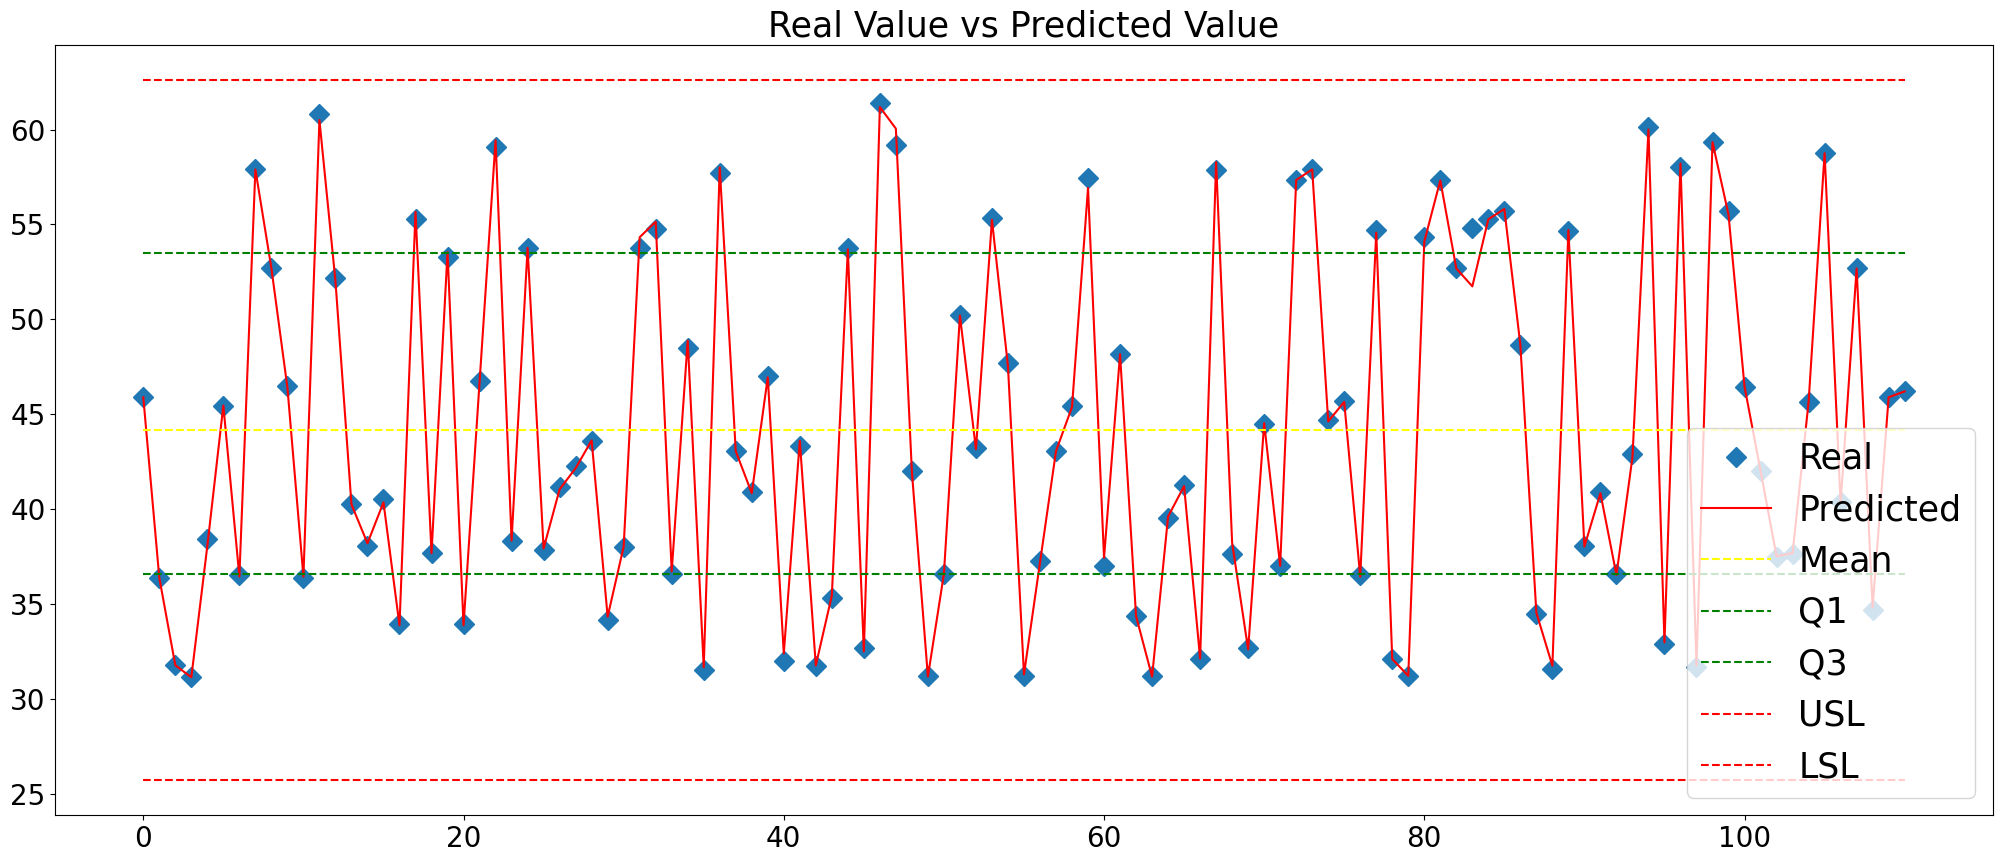

In [ ]:
# Graphic visualization of predictions by real values
plt.figure(figsize=(25,10))
plt.title('Real Value vs Predicted Value', fontsize=25)
plt.plot(df_comparison.index, df_comparison['Real_Data'], label = 'Real', marker='D', markersize=10, linewidth=0)
plt.plot(df_comparison.index, df_comparison['Predicted_Value'], label = 'Predicted', c='r', linewidth=1.5)
plt.plot(df_comparison.index, df_comparison['Average'], label = 'Mean', linestyle='dashed', c='yellow')
plt.plot(df_comparison.index, df_comparison['Q1'], label = 'Q1', linestyle='dashed',c='g')
plt.plot(df_comparison.index, df_comparison['Q3'], label = 'Q3', linestyle='dashed',c='g')

plt.plot(df_comparison.index, df_comparison['USL'], label = 'USL', linestyle='dashed',c='r')
plt.plot(df_comparison.index, df_comparison['LSL'], label = 'LSL', linestyle='dashed',c='r')

plt.legend(loc='best')
plt.legend(fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

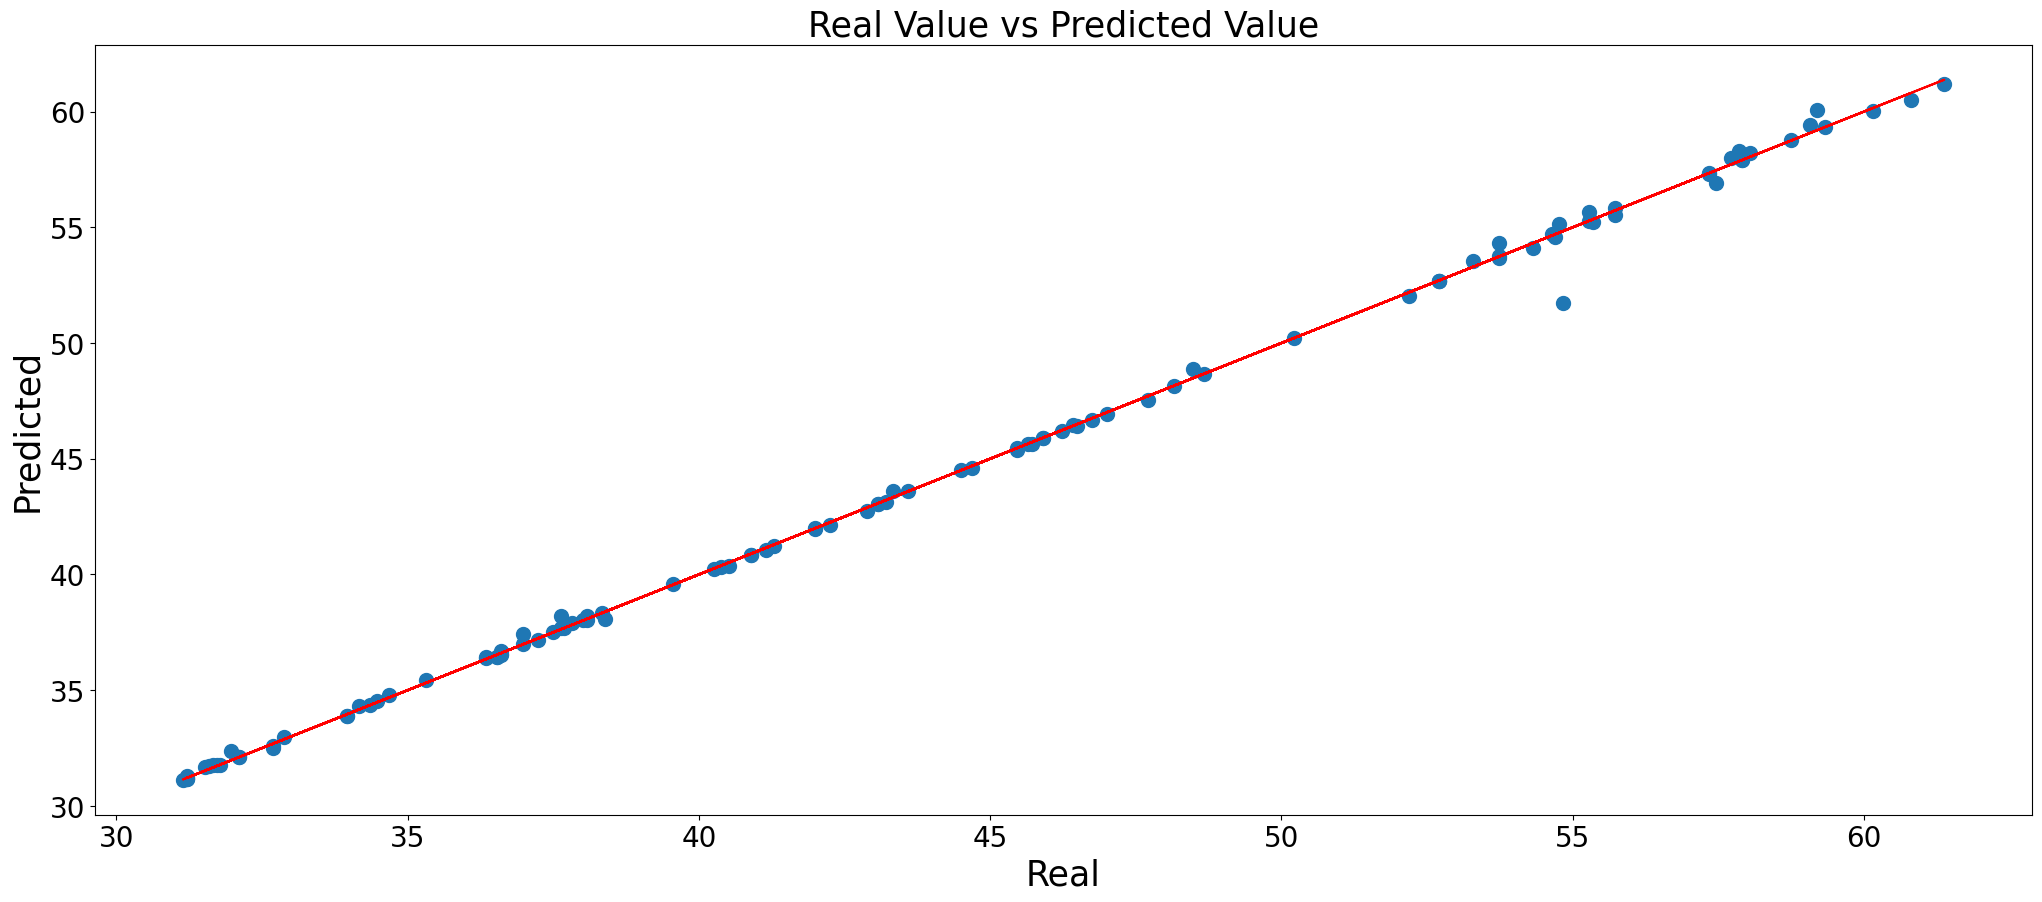

In [ ]:
# Graphic visualization of predictions by real values
plt.figure(figsize=(25,10))
plt.title('Real Value vs Predicted Value',fontsize=25)
plt.scatter(df_comparison['Real_Data'], df_comparison['Predicted_Value'], s=100)
plt.plot(df_comparison['Real_Data'],df_comparison['Real_Data'],c='r')

plt.xlabel('Real', fontsize=25)
plt.ylabel('Predicted', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

#AULA 12 - Decision Tree Regression

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

### Set Default Parameters - To make this notebook's output stable across runs

In [ ]:
default_test_size = 0.2

In [ ]:
seed = 42

### Importing the dataset

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/datasets exemplos colab/011-Dataset.xlsx")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
df

In [ ]:
df.describe()

### Create Pipeline with a StandardScaler and a Regressor

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

DecisionTreeRegressor:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=default_test_size, random_state=seed)

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state = seed))
    ])

### Grid Search with Cross Validation

In [ ]:
# hyperparameters grid to search within
hyperparameters = {'regressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
                   'regressor__splitter': ['best', 'random'],
                  }

In [ ]:
grid_search = GridSearchCV(pipe,
                           param_grid=hyperparameters,
                           return_train_score=True,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-2,
                           cv = 5)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
# Print Best Hyperparameters
cv_best_params = grid_search.best_params_
print('\n Best hyperparameters:')
print(cv_best_params)

### Run model with best hyperparameters

In [ ]:
pipe.set_params(**cv_best_params)

In [ ]:
pipe.get_params()

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
y_test_pred = pipe.predict(X_test)

### Analysis of Regression Errors

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
# Análise dos erros das previsões
rmse_test = math.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

df_metricas = pd.DataFrame(data={'RSME':[rmse_test], 'MAE':[mae_test], 'MAPE':[mape_test],'R²':[r2_test]})
df_metricas

### Plot Results

In [ ]:
y_pred = pd.DataFrame(data=pipe.predict(X_test), columns=['Predicted Values'])

In [ ]:
y_real = pd.DataFrame(data=y_test, columns=['Real Values'])

In [ ]:
# Preparation of the comparative DataFrame between the prediction and the actual value

df_comparison = pd.concat([y_real, y_pred],axis=1)
df_comparison.columns = ['Real_Data','Predicted_Value']
df_comparison['Percentage_difference'] = 100*(df_comparison['Predicted_Value'] - df_comparison['Real_Data'])/df_comparison['Real_Data']
df_comparison['Average'] = df_comparison['Real_Data'].mean()
df_comparison['Q1'] = df_comparison['Real_Data'].quantile(0.25)
df_comparison['Q3'] = df_comparison['Real_Data'].quantile(0.75)
df_comparison['USL'] = df_comparison['Real_Data'].mean() + 2*df_comparison['Real_Data'].std()
df_comparison['LSL'] = df_comparison['Real_Data'].mean() - 2*df_comparison['Real_Data'].std()

df_comparison.sort_index(inplace=True)

In [ ]:
df_comparison

In [ ]:
# Graphic visualization of predictions by real values
plt.figure(figsize=(25,10))
plt.title('Real Value vs Predicted Value', fontsize=25)
plt.plot(df_comparison.index, df_comparison['Real_Data'], label = 'Real', marker='D', markersize=10, linewidth=0)
plt.plot(df_comparison.index, df_comparison['Predicted_Value'], label = 'Predicted', c='r', linewidth=1.5)
plt.plot(df_comparison.index, df_comparison['Average'], label = 'Mean', linestyle='dashed', c='yellow')
plt.plot(df_comparison.index, df_comparison['Q1'], label = 'Q1', linestyle='dashed',c='g')
plt.plot(df_comparison.index, df_comparison['Q3'], label = 'Q3', linestyle='dashed',c='g')

plt.plot(df_comparison.index, df_comparison['USL'], label = 'USL', linestyle='dashed',c='r')
plt.plot(df_comparison.index, df_comparison['LSL'], label = 'LSL', linestyle='dashed',c='r')

plt.legend(loc='best')
plt.legend(fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
# Graphic visualization of predictions by real values
plt.figure(figsize=(25,10))
plt.title('Real Value vs Predicted Value',fontsize=25)
plt.scatter(df_comparison['Real_Data'], df_comparison['Predicted_Value'], s=100)
plt.plot(df_comparison['Real_Data'],df_comparison['Real_Data'],c='r')

plt.xlabel('Real', fontsize=25)
plt.ylabel('Predicted', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()